In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Hotel Reservations (1).csv")

# **Checking for missing value**

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


# **Checking data type of category and num variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

# **Checking for duplicates**

In [ ]:
df.duplicated().sum()

0

# **Mode of application of rooms**

In [ ]:
import plotly.express as px
data1=df.groupby('market_segment_type')['Booking_ID'].count()
fig = px.bar(data1,
             x=data1.index,
             y='Booking_ID',
             labels={'market_segment_type': "Market Segment Type", 'Booking_ID': "Booking Count"})
fig.show()

## **Meal_plan people prefer the most**

In [ ]:
data2=df.groupby('type_of_meal_plan')['Booking_ID'].count()
data2
fig = px.bar(data2,
             x=data2.index,
             y='Booking_ID',
             labels={'market_segment_type': "Market Segment Type", 'Booking_ID': "Booking Count"})
fig.show()

# **Room type preferred most**

In [ ]:
data3=df.groupby('room_type_reserved')['Booking_ID'].count()
fig = px.bar(data3,
             x=data3.index,
             y='Booking_ID',
labels={'market_segment_type': "Market Segment Type", 'Booking_ID': "Booking Count"})
fig.show()
data3


,Booking_ID
room_type_reserved,
Room_Type 1,28130
Room_Type 2,692
Room_Type 3,7
Room_Type 4,6057
Room_Type 5,265
Room_Type 6,966
Room_Type 7,158


# **Week Nights VS Weekend Nights**

<BarContainer object of 2 artists>

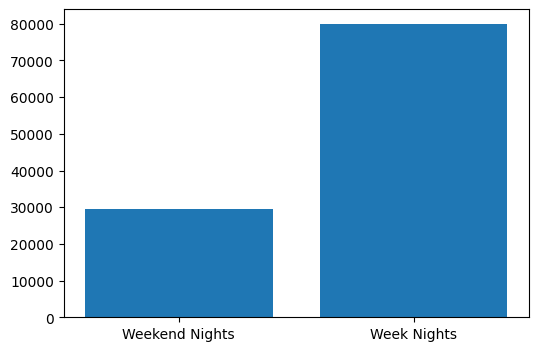

In [ ]:
weekend_nights = df['no_of_weekend_nights'].sum()
week_nights = df['no_of_week_nights'].sum()
plt.figure(figsize=(6, 4))
plt.bar(['Weekend Nights', 'Week Nights'], [weekend_nights, week_nights])


# **Average Price Per Room: Week Nights vs Weekend Nights**

In [ ]:
avg_weeknight_price = df[df["no_of_week_nights"] > 0]["avg_price_per_room"].mean()
avg_weekend_price = df[df["no_of_weekend_nights"] > 0]["avg_price_per_room"].mean()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Week Nights", "Weekend Nights"],
    y=[avg_weeknight_price, avg_weekend_price],
    text=[f"${avg_weeknight_price:.2f}", f"${avg_weekend_price:.2f}"],
    textposition="outside"
))
fig.update_layout(
    title="Average Price Per Room: Week Nights vs Weekend Nights",
    xaxis_title="Stay Type",
    yaxis_title="Average Price Per Room",
    template="plotly_white"
)

fig.show()

# **Room Type preference**

In [ ]:
import plotly.express as px

room_type_nights = df.groupby("room_type_reserved")[["no_of_week_nights", "no_of_weekend_nights"]].sum().reset_index()

room_type_nights_melted = room_type_nights.melt(id_vars="room_type_reserved",
                                                var_name="Stay Type", value_name="Total Nights")

room_type_nights_melted["Stay Type"] = room_type_nights_melted["Stay Type"].replace({
    "no_of_week_nights": "Week Nights",
    "no_of_weekend_nights": "Weekend Nights"
})

fig = px.bar(room_type_nights_melted,
             x="room_type_reserved", y="Total Nights", color="Stay Type",
             barmode="group",
             title="Room Type Preference: Week Nights vs. Weekend Nights",
             labels={"room_type_reserved": "Room Type", "Total Nights": "Total Nights Booked"},
             text_auto=True)

fig.show()



# **Avg price per room type**

In [ ]:
import plotly.express as px

room_price = df.groupby("room_type_reserved")["avg_price_per_room"].mean().reset_index()

fig = px.bar(room_price, x="room_type_reserved", y="avg_price_per_room",
             title="Average Price Per Room Type",
             labels={"room_type_reserved": "Room Type", "avg_price_per_room": "Avg Price Per Room"})

fig.show()


# **Guest Composition on Weekend vs Week nights**

In [ ]:
import plotly.express as px

adults_children_nights = df.groupby(["no_of_adults", "no_of_children"])[["no_of_week_nights", "no_of_weekend_nights"]].sum().reset_index()

adults_children_nights_melted = adults_children_nights.melt(id_vars=["no_of_adults", "no_of_children"],
                                                             var_name="Stay Type", value_name="Total Nights")

adults_children_nights_melted["Stay Type"] = adults_children_nights_melted["Stay Type"].replace({
    "no_of_week_nights": "Week Nights",
    "no_of_weekend_nights": "Weekend Nights"
})

adults_children_nights_melted["Guest Type"] = adults_children_nights_melted.apply(
    lambda row: f"{row['no_of_adults']} Adults, {row['no_of_children']} Children", axis=1
)

adults_children_nights_melted = adults_children_nights_melted.sort_values(by=["no_of_adults", "no_of_children"])

fig = px.bar(adults_children_nights_melted,
             x="Guest Type", y="Total Nights", color="Stay Type",
             barmode="group",
             title="Guest Composition on Weekend vs Week nights",
             labels={"Guest Type": "Guest Composition (Adults & Children)", "Total Nights": "Total Nights Booked"},
             text_auto=True)

fig.update_layout(xaxis_tickangle=-90)

fig.show()
